# Band-pass filter (from 0,4 to 1,8 MHz)
### Author: Vladimir Andreev

### 1. Introduction
A band-pass filter or **bandpass filter** ( **BPF** ) is a device that passes frequencies within a certain range and rejects (attenuates) frequencies outside that range.
An electronics and signal processing, a filter is usually a two-port circuit or device which removes frequency components of a signal (an alternating voltage or current). A band-pass filter allows through components in a specified band of frequencies, called its passband but blocks components with frequencies above or below this band. This contrasts with a high-pass filter, which allows through components with frequencies above a specific frequency, and a low-pass filter, which allows through components with frequencies below a specific frequency. In digital signal processing, in which signals represented by digital numbers are processed by computer programs, a band-pass filter is a computer algorithm that performs the same function. The term band-pass filter is also used for optical filters, sheets of colored material which allow through a specific band of light frequencies, commonly used in photography and theatre lighting, and acoustic filters which allow through sound waves of a specific band of frequencies.

An example of an analogue electronic band-pass filter is an RLC circuit (a resistor–inductor–capacitor circuit). These filters can also be created by combining a low-pass filter with a high-pass filter.

A bandpass signal is a signal containing a band of frequencies not adjacent to zero frequency, such as a signal that comes out of a bandpass filter.

An ideal bandpass filter would have a completely flat passband: all frequencies within the passband would be passed to the output without amplification or attenuation, and would completely attenuate all frequencies outside the passband.

In practice, no bandpass filter is ideal. The filter does not attenuate all frequencies outside the desired frequency range completely; in particular, there is a region just outside the intended passband where frequencies are attenuated, but not rejected.

Bandwidth measured at half-power points (gain −3 dB, $\sqrt2/2$, or about 0.707 relative to peak) on a diagram showing magnitude transfer function versus frequency for a band-pass filter. [1]

![Alt text](https://electronicspost.com/wp-content/uploads/2015/10/frequency-response-of-band-pass-filter1.png)

The bandwidth of the filter is simply the difference between the upper and lower cutoff frequencies. The shape factor is the ratio of bandwidths measured using two different attenuation values to determine the cutoff frequency, e.g., a shape factor of 2:1 at 30/3 dB means the bandwidth measured between frequencies at 30 dB attenuation is twice that measured between frequencies at 3 dB attenuation.

A band-pass filter can be characterized by its **Q factor**. The Q-factor is the reciprocal of the fractional bandwidth. A high-Q filter will have a narrow passband and a low-Q filter will have a wide passband. These are respectively referred to as narrow-band and wide-band filters.

We have most popular RF filter typologies: **Butterworth**, **Chebyshev**, **Bessel**, and **Elliptic**. Each filter types has it's own strengths depending on the application.

 - **<font color='red'>Bessel Filter</font>** is ideal for applications that require minimal phase shift.  Due to the gentle frequency response of the Bessel filter, it can only be used in applications where there is adequate space between the passband and stopband.
 - **<font color='green'>Butterworth Filters</font>** are typically forgiving to part tolerances and values of discrete elements (capacitors, inductors, and resistors).  For most bandpass designs, the (Voltage Standing Wave Ratio) VSWR at center frequency is extremely good.
 - **<font color='orange'>The Chebyshev filter</font>** is the workhorse of the common filter typologies.  It's response is easily realised with few componets and offers very good selectivity with one of the steepest roll-off responses of the group.
 - **<font color='blue'>Elliptic (Cauer) Filter</font>** is best used in applications where selectivity is a key driver in the filter design.  The elliptic filter's ripple amplitude of the passband and stopband can be adjusted seperately to fit the application. [2]

![Alt text](https://blog.bliley.com/hs-fs/hubfs/filter_post/filter-response-comparison.png?width=1280&name=filter-response-comparison.png)

Note that the higher the **BPF** filter order, the higher the number of cascaded stages there are within the filter design, and the closer the filter becomes to the ideal “brick wall” response. In practice however, **BPF** ideal frequency response is unattainable as it produces excessive passband ripple. [3]

$\;\;\;\;\;\;\;\;\;$ ![Alt text](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/filter-fil57.gif)

### 2. Application
Bandpass filters (**BPF**) are widely used in wireless transmitters and receivers. The main function of such a filter in a transmitter is to limit the bandwidth of the output signal to the band allocated for the transmission. This prevents the transmitter from interfering with other stations. In a receiver, a bandpass filter allows signals within a selected range of frequencies to be heard or decoded, while preventing signals at unwanted frequencies from getting through. Signals at frequencies outside the band which the receiver is tuned at, can either saturate or damage the receiver. Additionally they can create unwanted mixing products that fall in band and interfere with the signal of interest. Wideband receivers are particularly susceptible to such interference. A bandpass filter also optimizes the signal-to-noise ratio and sensitivity of a receiver.

In both transmitting and receiving applications, well-designed bandpass filters, having the optimum bandwidth for the mode and speed of communication being used, maximize the number of signal transmitters that can exist in a system, while minimizing the interference or competition among signals. This is **[a link](https://en.wikipedia.org/wiki/Band-pass_filter)** to Wikipedia for more details.


### 3. Analysis
A band-pass filter attenuates both low and high frequency components of a signal and therefore, as the name suggests, allows for a band of frequencies to pass through. In this post, we will briefly go over an analog implementation of this type of filter by cascading high-pass and low-pass passive analog filters. I will also go through a digital implementation using Python.

A "filter" is a circuit takes a signal, $V_{in}$, as input and produces a signal, $V_{out}$, as output. In this context, a "signal" is a voltage that changes over time.

 * A filter is "**low-pass**", if it allows low-frequency signals to pass from $V_{in}$ to $V_{out}$ unchanged, but it reduces the amplitude of high-frequency signals.
 * A filter is "**high-pass**", if it allows high-frequency signals to pass from $V_{in}$ to $V_{out}$ unchanged, but it reduces the amplitude of low-frequency signals.

#### 3.1 A simple low-pass (first order) RC filter:

![Alt text](https://ecstudiosystems.com/discover/textbooks/basic-electronics/filters/images/rc-low-pass-filter.jpg)

By applying the laws of circuit analysis, we can derive a differential equation that describes the behavior of this system. By solving the differential equation, we can predict the effect of this circuit on any input signal.

Suppose we are given $V_{in}$ and $V_{out}$ at a particular instant in time. By Ohm's law, which is a simple model of the behavior of resistors, the instantaneous current through the resistor is:

$ I_R = (V_{in} - V_{out}) / R $

where $R$ is resistance in ohms.

Assuming that no current flows through the output of the circuit, Kirchhoff's current law implies that the current through the capacitor is:

$ I_C = I_R $

According to a simple model of the behavior of capacitors, current through the capacitor causes a change in the voltage across the capacitor:

$ I_C = C \frac{d V_{out}}{dt} $

where $C$ is capacitance in farads (F).

Combining these equations yields a differential equation for $V_{out}$:

$ \frac{d }{dt} V_{out} = \frac{V_{in} - V_{out}}{R C} $

Follow the instructions blow to simulate the low-pass filter for input signals like this:

$ V_{in}(t) = A \cos (2 \pi f t) $

where $A$ is the amplitude of the input signal (say 5 V in TTL), and $f$ is the frequency of the signal in Hz.

By analysis we can show that the **output** ratio for this signal is:

$A = \frac{1}{\sqrt{1 + (R C \omega)^2}}$

where $\omega = 2 \pi f$, and the phase offset is:

$ \phi = \arctan (- R C \omega)$

#### 3.2 Band-pass Filter

A band-pass filter attenuates both low and high frequency components of a signal and therefore, as the name suggests, allows for a band of frequencies to pass through. In this post, we will briefly go over an analog implementation of this type of filter by cascading high-pass and low-pass passive analog filters.

![Alt text](https://thingsdaq.files.wordpress.com/2022/11/band-pass-rc-circuit-1.png)

The RC circuit diagram shows the high- and low-pass filters in a cascaded arrangement. The cutoff frequency (rad/s) for the high-pass is $f_c = 1/({R_1C_1})$ and $f_c = 1/({R_2C_2})$ for the low-pass. In terms of time constants (which will be helpful later with conciseness), we have respectively $\tau_1 = R_1C_1$ and $\tau_2 = R_2C_2$.

For example, a band-pass filter with cutoff frequencies of approximately 0.1 and 2 Hz can be realized with $R_1 = 16 k\ohm$, $C_1 = 100 \mu F$, $R_2 = 8 k\ohm$ and $C_2 = 10 \mu F$. Or, using time constants, $\tau_1 = 1.6 s$ and $\tau_2 = 0.08 s$.

That’s about it for the analog implementation of a first-order band-pass filter. Let’s see how we can derive the digital version of the same filter and have it ultimately implemented in Python code.

#### 3.3 Continuous Filter

The first step is to come up with a mathematical representation of the band-pass filter in the analog (continuous) domain. Let’s work with the Laplace transform (or s-domain), which conveniently turns differential equations into much easier to solve polynomial equations.

In the case of the RC circuit for the band-pass filter, we want to find the transfer function between the output voltage $V_{out}$ and the input voltage $V_{in}$. In other words, between the raw and the filtered signals.

The relationships between voltage and current for the resistor and capacitor are given by:

*V = R.i* $\;\;$  and $\;\;$  $\frac{d}{dt}V = \frac{1}{C}i$

In the s-domain, the derivative operatoris $\frac{d}{dt}$ is "replaced" with the algebraic **s** operator:

V(s) = R.*i*(s) $\;\;$ and $\;\;$ sV(s) = $\frac{1}{C}.i(s)$

The filter can be separated into two filters (a high-pass and a low-pass), where distinct transfer functions between $V_x$ and $V_{in}$, as well as between $V_{out}$ and $V_x$, can be derived and then combined.

![Alt text](https://thingsdaq.files.wordpress.com/2022/12/band-pass-high.png)

Solving the system’s first equation (below) for the current and substituting in the second equation gives:

$V_x = R_1.i$ $\;\;\;\;$ $V_{in} = i/({C_1}.s) + V_x $ $\;\;\;\;$ $V_{in} = V_x/(R_1C_1.s) + V_x$

And rearranging as a transfer function: $V_x/V_{in} = (R_1C_1.s)/(R_1C_1.s + 1)$

![Alt text](https://thingsdaq.files.wordpress.com/2022/12/band-pass-low.png)

Solving the system’s first equation (below) for the current and substituting in the second equation gives:

$V_{out} = i/(C_2.s)$ $\;\;\;\;$ $V_{x} = R_2.i + V_{out} $ $\;\;\;\;$ $V_x = R_2C_2.s.V_{out} + V_{out}$

And rearranging like the high-pass case: $\;\;\;\;$
![Alt text](https://thingsdaq.files.wordpress.com/2022/12/band-pass-tf-low.png?w=200&h=80)

Finally, solving the function for $V_x$ the low-pass filter forand substituting the result in the function for the high-pass filter, will lead to the transfer function of the band-pass filter below (also shown in terms of time constants and descending powers of **s**):

![Alt text](https://thingsdaq.files.wordpress.com/2022/12/band-pass-tf-rc.png?w=300&h=120) $\;\;\;\;$ ![Alt text](https://thingsdaq.files.wordpress.com/2022/12/band-pass-tf-tau.png?w=300&h=120)


#### 3.4 Discrete Filter

The next task is to convert the continuous system to a discrete one. Similarly to the continuous domain, where the derivative operator *d/dt* is represented by the operator **s**, the discrete domain has the operator **z**. $z^0$ (or 1) corresponds to the current time step discrete value y[n], $z^{-1}$ corresponds to the previous value y[n-1], $z^{-2}$ to the value before the previous one y=[n-2], and so on. [4]

As seen in the post about digital filtering, for a discrete system with sampling period $T_S$, the derivative of a continuous variable can be approximated by the backward difference below:

$$\frac{dy}{dt} \cong  \frac{y[n] - y[n-1]}{T_S}$$

And in terms of operators, we can write:

$$s \cong  \frac{1 - z^{-1}}{T_S}$$

Substituting s in the continuous transfer function for the band-pass filter gives the equation in the z-*domain* below. Note also that, because we are talking about a filter for any type of signal, the voltages were replaced by more general input and output variables.

$$\frac{Y(z)}{X(z)} =  \frac{\tau_1(\frac{1 - z^{-1}}{T_S})}{\tau_1\tau_2(\frac{1 - z^{-1}}{T_S})^2 + (\tau_1 + \tau_2)(\frac{1 - z^{-1}}{T_S}) + 1}$$

Carrying out the math so we can regroup in terms of descending powers of **z**, and multiplying both top and bottom by ${T_S}^2$, leads to:

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ $ \frac{Y(z)}{X(z)} = \frac{\tau_1.T_S - \tau_1.T_Sz^{-1}}{(\tau_1\tau_2+(\tau_1+\tau_2)T_S+T_S^2)-(2\tau_1\tau_2+(\tau_1+\tau_2)T_S)z^{-1}+\tau_1\tau_2z^{-2}} $

We can then rearrange the **z** transfer function above to resemble a difference equation:

$$a_0Y(z) = -a_1Y(z)(z^{-1}) -a_2Y(z)(z^{-2}) + b_0X(z) + b_1X(z)z^{-1}$$

Where:

$\;\;\;\;$ $a_0 = \tau_1\tau_2 + (\tau_1 + \tau_2)T_S + {T_S}^2$

$\;\;\;\;$ $a_1 = - (2\tau_1\tau_2 + (\tau_1 + \tau_2)T_S)$

$\;\;\;\;$ $a_2 = \tau_1\tau_2$

$\;\;\;\;$ $b_0 = \tau_1T_S$

$\;\;\;\;$ $b_1 = - \tau_1T_S$

At last, the equation above can be brought to a more useful difference equation form, by replacing the **z** operators by their corresponding discrete system values:

$\;\;\;\;$ $a_0y[n] = - a_1y[n-1] - a_2y[n-2] + b_0x[n] + b_1x[n-1]$

### 4. Python Code for Band-Pass Filter
The following Python program implements the digital filter with a fictitious signal comprised of three sinusoidal waves with frequencies 0.01, 0.5, and 25 Hz. The low and high cutoff frequencies of the filter are 0.1 and 2 Hz, therefore allowing only the 0.5 Hz component of the original signal to pass through.

By analyzing the code, it is straightforward to identify the filter coefficients determined in the previous section. The difference equation was implemented in the more general form:

$$ y[n] = -\sum_{k=1}^{N}a_k.y[n-k] +\sum_{k=0}^{M}b_k.y[n-k] $$

where the sets of coefficients $a_k$ and $b_k$ normalized by the coefficient $a_0$ of the output **y[n]**. This approach allows for any type of digital filter to be used in the code, as long as the normalized coefficients are defined.

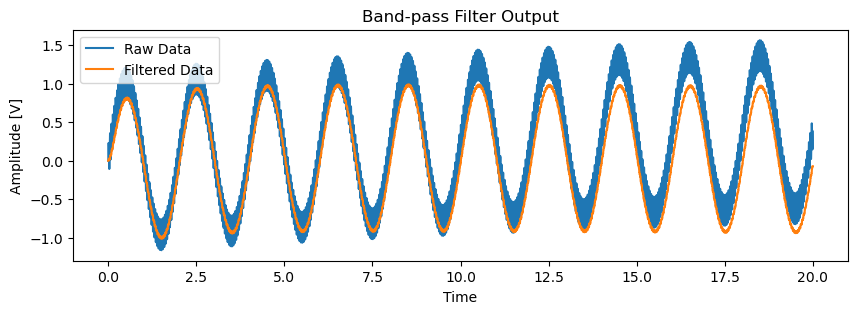

In [2]:
# Importing modules and classes
import numpy as np
import matplotlib.pyplot as plt

# "Continuous" signal parameters
tstop = 20  # Signal duration (s)
Ts0 = 0.0002  # Time step (s)
fs0 = 1/Ts0  # Sampling frequency (Hz)
# Discrete signal parameters
tsample = 0.01  # Sampling period for code execution (s)
# Preallocating output arrays for plotting
tn = []
xn = []
yn = []

# Creating arbitrary signal with multiple sine functions
freq = [0.01, 0.5, 25]  # Sine frequencies (Hz)
ampl = [0.4, 1.0, 0.2]  # Sine amplitudes
t = np.arange(0, tstop+Ts0, Ts0)
xs = np.zeros(len(t))
for ai, fi in zip(ampl, freq):
    xs = xs + ai*np.sin(2*np.pi*fi*t)

# First order digital band-pass filter parameters
fc = np.array([0.1, 2])  # Band-pass cutoff frequencies (Hz)
tau = 1/(2*np.pi*fc)  # Filter time constants (s)
# Filter difference equation coefficients
a0 = tau[0]*tau[1]+(tau[0]+tau[1])*tsample+tsample**2
a1 = -(2*tau[0]*tau[1]+(tau[0]+tau[1])*tsample)
a2 = tau[0]*tau[1]
b0 = tau[0]*tsample
b1 = -tau[0]*tsample
# Defining normalized coefficients
a = np.array([1, a1/a0, a2/a0])
b = np.array([b0/a0, b1/a0])
# Initializing filter values
x = np.array([0.0]*(len(b)))  # x[n], x[n-1], x[n-2], ...
y = np.array([0.0]*(len(a)))  # y[n], y[n-1], y[n-2], ...

# Executing DAQ loop
tprev = 0
tcurr = 0
while tcurr <= tstop:
    # Doing I/O computations every `tsample` seconds
    if (np.floor(tcurr/tsample) - np.floor(tprev/tsample)) == 1:
        # Simulating DAQ device signal acquisition
        x[0] = xs[int(tcurr/Ts0)]
        # Filtering signal
        y[0] = -np.sum(a[1::]*y[1::]) + np.sum(b*x)
        # Updating previous input values
        for i in range(len(b)-1, 0, -1):
                x[i] = x[i-1]
        # Updating previous output values
        for i in range(len(a)-1, 0, -1):
                y[i] = y[i-1]
    # Updating output arrays
    tn.append(tcurr)
    xn.append(x[0])
    yn.append(y[0])
    # Incrementing time step
    tprev = tcurr
    tcurr += Ts0

# Plotting results
plt.figure(figsize=(10, 3)) # Window size
plt.plot(t, xs, label='Raw Data')
plt.plot(tn, yn, label='Filtered Data')
plt.xlabel('Time')
plt.ylabel('Amplitude [V]')
plt.title('Band-pass Filter Output')
plt.legend()
plt.show()

### 5  Band-Pass Filter from 0,4 to 1,8 MHz

#### 5.1 Key considerations in project design.

In the design of the **<font color='purple'>BPF</font>** electronic circuit, in order to be considered a **<font color='purple'>successful project</font>**, the following **<font color='purple'>criteria</font>** are applied:

1. The input impedance of the filter should be such that it can be powered by a standard **digital signal**. For example, a TTL digital 1 with a voltage of 5V (max). A very low resistance would burn out the input signal generator.
2. The frequency range of the filter is from 400 kHz to 1800 Hz. The **passband** is 1400 kHz. This is a **very high value** and it is possible that such a filter would be impossible to create.

#### 5.2 Passive filter design.

Using the online calculator on the site: **[Passive Bandpass Filter Calculator](https://www.learningaboutelectronics.com/Articles/Bandpass-filter-calculator.php)** [5], for this scheme and pass-band from 400 kHz to 1800 kHz:

![Alt text](https://www.learningaboutelectronics.com/images/Passive-bandpass-filter.png)

...we get for the classic BPF circuit the following values ​​of the electronic elements:

**$C_1 = 100\;nF, \;\;\; R_1 = 4\;‎Ω, \;\;\; C_2 = 1\;nF, \;\;\; R_2 = 88\;‎Ω $**

For the maximum frequency of 1800 kHz, [according to Wikipedia](https://bg.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BD%D0%B4%D0%B5%D0%BD%D0%B7%D0%B0%D1%82%D0%BE%D1%80) [6] the reactance of the capacitor will be:

$X = -\frac{1}{2.\pi.f.C} = -\frac{1}{2.\pi.1.8.10^6.100.10^{-9}} \approx (0 -0.8846j)\;‎Ω \approx 1\;‎Ω$

Together with resistor $R_1 = 4\;‎Ω$, this circuit will have a resistance of about $5\;‎Ω$. A combination of TTL elements withstanding $5V / 5‎Ω = 1 A$ is practically pointless to implement. **According to the criteria set for the realization of the project** (see 5.1), this **<font color='purple'>variant of the BPF is dropped</font>**.

#### 5.3 Active Inverting Op Amp Bandpass Filter - design. 

On the same WEB site there is also: **Active Inverting Op Amp Bandpass Filter**

![Alt text](https://www.learningaboutelectronics.com/images/Active-inverting-op-amp-bandpass-filter.png)

Here we have: **Low Cutoff Frequency = $\frac{1}{2.\pi.R_2.C_2}$ High Cutoff Frequency = $\frac{1}{2.\pi.R_1.C_1}$ Gain = $-\frac{R_2}{R_1}$**

When we enter the **Gain = 0.5**, we receive:
$R_1 = 1\;kΩ$, $C_1 = 0.4\;nF$, $R_2 = 0.5\;k‎Ω$, $C_2 = 0.2\;nF$ - possible option.

When we enter the **Gain = 1**, we receive:
$R_1 = 1\;kΩ$, $C_1 = 0.4\;nF$, $R_2 = 1\;k‎Ω$, $C_2 = 0.1\;nF$ - possible option.

When we enter the **Gain = 2**, we receive:
$R_1 = 1\;k‎Ω$, $C_1 = 0.4\;nF$, $R_2 = 2\;k‎Ω$, **<font color='purple'>$C_2 = 0\;nF$ - impossible option!</font>**

When we enter the **Gain = 3 and more: always <font color='purple'>$C_2 = 0\;nF$ - impossible option!</font>**
 
#### 5.4 Active Noninverting Op Amp Bandpass Filter - design. 

On the same WEB site there is also: **Active Noninverting Op Amp Bandpass Filter**

![Alt text](https://www.learningaboutelectronics.com/images/Active-noninverting-op-amp-bandpass-filter.png)

Here we have: **Low Cutoff Frequency = $\frac{1}{2.\pi.R_2.C_2}$ High Cutoff Frequency = $\frac{1}{2.\pi.R_1.C_1}$ Gain = $1 + \frac{R_4}{R_3}$**

When we enter the **Gain = 0.5**, we receive:
$R_1 = 1\;kΩ$, $C_1 = 0.4\;nF$, $R_2 = 0.5\;k‎Ω$, $C_2 = 0.2\;nF$, $R_3 = 1\;k‎Ω$, **<font color='purple'>$R_4 = -0.5\;k‎Ω$ - impossible option!</font>**

When we enter the **Gain = 1**, we receive:
$R_1 = 1\;kΩ$, $C_1 = 0.4\;nF$, $R_2 = 1\;k‎Ω$, $C_2 = 0.1\;nF$, $R_3 = 1\;k‎Ω$, **<font color='purple'>$R_4 = 0\;k‎Ω$ - impossible option!</font>**

When we enter the **Gain = 2** and more, we receive:
$R_1 = 1\;k‎Ω$, $C_1 = 0.4\;nF$, $R_2 = 2\;k‎Ω$, **<font color='purple'>$C_2 = 0\;nF$</font>**, $R_3 = 1\;k‎Ω$, $R_4 = 1\;k‎Ω$ **<font color='purple'>- impossible option!</font>**

When we enter the **Gain = 3 and more: always <font color='purple'>$C_2 = 0\;nF$ - impossible option!</font>**


#### 5.4 Multiple Feedback Band-pass Filter

Using the online **second** calculator on the site: **[Active Band-Pass Filter Calculator](https://www.ee-diary.com/2023/03/active-band-pass-filter-calculator.html#)** [7], for this scheme and pass-band from 400 kHz to 1800 kHz we have:

![Alt text](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjssNj4AGULUXdtDJEeJhE0nrswGvBgPACPbm70S57KMU54C3qGcwBffeyfk4fnCj6INUNx-qH3YZXgcCoDPinY7uruH3lCg7zPz4PSv-hi5713mOJ0NnfCm1bDIDkexCB0FhnT_qL1YUJKbXtDytJBwYzMUofQWkCUhaFSXjvQKHmbz8GHsZ8QH0qipA/s1600/Multiple-Feedback%20Band-Pass%20Filter.png)
(Multiple-Feedback Band-Pass Filter Calculator)

Here on the site we use the **second** calculator: **Calculate the R and C values for the multiple feedback filter at a given frequency and Q factor**.
We assign values to bandwidth $BW = 1400\;kHz$ (1800 kHz - 400 kHz), $A_0 = 4$, $C_1 = C_2 = 10\;nF$.
We get for this BPF circuit the following values ​​of the electronic elements:

$Q = 0.5$, $R_1 = 2.84\;Ω$, $R_2 = 22.75\;Ω$ and **<font color='purple'>$R_3 = -3.25\;Ω$ - impossible option!</font>**

However we vary the input data, resistor **$R_3$ always remains negative**. From other online calculators for the same scheme, it becomes clear why this is an impossible solution with these input data - the low frequencies are always at least 2-3 dB higher in level than the high ones.
 
From this site **[Multiple feedback bandpass filter calculations are wrong when C1 and C2 are different values](https://electronics.stackexchange.com/questions/649220/multiple-feedback-bandpass-filter-calculations-are-wrong-when-c1-and-c2-are-diff)** [8], for the **same scheme of BPF**, we take **Mathematica** simulation code and rewrite it for **Python**. Again we get that such a filter is impossible:

In [13]:
import sympy as sp

# Define the variables
R1 = 2.84
R2 = 22.75
R3 = 0.1
C1 = 1e-8
C2 = 1e-8
s = sp.I * sp.Symbol('omega')

# Define the transfer function
h = (-s/(C1*R1))/(s**2 + (s/R3)*((1/C1) + (1/C2)) + (1/(C1*C2*R3))*((1/R1) + (1/R2)))

# Find magnitude of the transfer function
real_part, imag_part = sp.expand(h).as_real_imag()
H = sp.simplify(sp.sqrt(real_part**2 + imag_part**2))

# Handle potential absence of omega_max
omega_sym = sp.symbols('omega_sym')
if omega_max:  # Check if omega_max exists
    H_max = H.subs('omega', omega_sym).subs(omega_max[0], omega_sym)
else:
    print("omega_max not provided. Skipping calculations requiring it.")
    H_max = None  # Set H_max to None to avoid further errors

# Find cutoff frequencies (use H_max if available)
if H_max:
    omega_cutoff1 = sp.solve(H - H_max*(1/sp.sqrt(2)), 'omega')[0]
    omega_cutoff2 = sp.solve(H - H_max*(1/sp.sqrt(2)), 'omega')[1]
else:
    print("H_max not available. Skipping cutoff frequency calculations.")
    omega_cutoff1, omega_cutoff2 = None, None  # Set cutoffs to None

# Find bandwidth and quality factor (use cutoffs if available)
if omega_cutoff1 and omega_cutoff2:
    bandwidth = abs(omega_cutoff1 - omega_cutoff2)
    quality_factor = omega_max / bandwidth if omega_max else None
else:
    print("Cutoff frequencies not available. Skipping bandwidth and quality factor calculations.")
    bandwidth, quality_factor = None, None  # Set bandwidth and quality factor to None

# Print the results
print("... --- ...")
print(f"The maximum frequency is given by: {omega_max} rad/sec with H_max = {H_max}")
print(f"Cut-off frequencies omega_cutoff1 = {omega_cutoff1} rad/sec and omega_cutoff2 = {omega_cutoff2} rad/sec")
print(f"Bandwidth = {bandwidth} rad/sec and quality factor = {quality_factor}")

# To obtain approximate values, provide numeric values for resistors and capacitors
# The maximum frequency is given by: omega_max rad/sec with H_max = H_max
# Cut-off frequencies omega_cutoff1 = omega_cutoff1 rad/sec and omega_cutoff2 = omega_cutoff2 rad/sec
# Bandwidth = bandwidth rad/sec and quality factor = quality_factor
# In order to give approximate values, choose values for resistors and capacitors.

omega_max not provided. Skipping calculations requiring it.
H_max not available. Skipping cutoff frequency calculations.
Cutoff frequencies not available. Skipping bandwidth and quality factor calculations.
... --- ...
The maximum frequency is given by: [] rad/sec with H_max = None
Cut-off frequencies omega_cutoff1 = None rad/sec and omega_cutoff2 = None rad/sec
Bandwidth = None rad/sec and quality factor = None


Using the online **first** calculator on the site: **[Active Band-Pass Filter Calculator](https://www.ee-diary.com/2023/03/active-band-pass-filter-calculator.html#)** [7], for this scheme and pass-band from 400 kHz to 1800 kHz we have:

![Alt text](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiX2ui0t2u5QqczzjSkChnQkFcZIntEUQ4D3wutLe_MAV0_KRQVaLSkhsRx_mnlvrZLQUALH7MhLQtpRh3I0KPdquMMp9qhdRV__slxysaaxXLNLUzUaaxLXXxKcNG_Xov5cXJoQDk9awzXLQMjVVnH-AqxDgNUGy74fIZXxGXCPyrlMkyYZk6rU_VDDg/s1600/Two%20pole%20Cascaded%20Band-Pass%20Filter%20circuit%20diagram.png)
(Two pole Cascaded Band-Pass Filter Calculator)

We assign values to $f_0 = \sqrt{f_{c1}f_{c2}} \approx 849 kHz$, $BW = 1400\;kHz$, $A_v = 1$, $C_{A1} = C_{B1} = 1\;nF$, $A_v = 1$, $C_{A2} = C_{B2} = 1\;nF$ and $A_v = 1$, $R_1 = R_2 = 1\;kΩ$. We get for this BPF circuit the following values ​​of the electronic elements:

$Q = 0.61$, $R_{A1} = R_{B1} = 1.03\;Ω$, $R_{A2} = R_{B2} = 1.07\;kΩ$, $R_2 = R_4 = 1\;kΩ$, <font color='purple'>**$f_l = F_{low} = 149\;kHz$** and **$f_h = F_{high} = 1.55\;MHz$- impossible option!</font>**

At the same time, the **passed frequency** band of the filter **does not depend at all on the set values** of the resistors and capacitors.

### Summary

1. https://en.wikipedia.org/wiki/Band-pass_filter
2. https://blog.bliley.com/filter-typology-face-off-a-closer-look-at-the-top-4-filter-types
3. https://www.electronics-tutorials.ws/filter/filter_8.html
4. https://thingsdaq.org/2022/12/11/band-pass-filter/
5. https://www.learningaboutelectronics.com/Articles/Bandpass-filter-calculator.php#answer1
6. https://bg.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BD%D0%B4%D0%B5%D0%BD%D0%B7%D0%B0%D1%82%D0%BE%D1%80
7. https://www.ee-diary.com/2023/03/active-band-pass-filter-calculator.html#
8. https://electronics.stackexchange.com/questions/649220/multiple-feedback-bandpass-filter-calculations-are-wrong-when-c1-and-c2-are-diff